
# 1. INTRODUCTION
<center>
<img src="https://media.istockphoto.com/id/486407276/photo/scratched-metal-plate.jpg?s=612x612&w=0&k=20&c=287P038f_s7l46bNz5DOCOJckPD8VaM0V_A4c7boPIQ=" width=1300 height=1000 />
</center>

**PROBLEM STATEMENT: Steel Plate Defect Prediction**

<font size="3">
A dataset of steel plate faults, classified into 7 different types. The goal was to train machine learning for automatic pattern recognition. </font>

<font size="3">Type of dependent variables (7 Types of Steel Plates Faults):</font>

1. Pastry

2. Z_Scratch

3. K_Scatch

4. Stains

5. Dirtiness

6. Bumps

7. Other_Faults

**EVALUTAION METRIC:** ROC AUC

<font size="3">There are no missing values in the data</font>

# 2. IMPORTS

In [1]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
!pip install gap-stat
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
!pip install optuna
import optuna
!pip install cmaes
import cmaes
import xgboost as xgb
!pip install catboost
!pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
!pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
!pip install -U imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

  Installing build dependencies ... - \ | / - \ | done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=d86a569a5017fbc4a77ba80a0c9ee3116f30e2f1b1f3c2d8b86eaa2f26bab7e7
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --install-option


/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## 2.1 LOAD DATA

In [2]:
train=pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')
original=pd.read_csv("/kaggle/input/steel-plates-faults/SteelPlatesFaults.csv")

train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)

train_copy=train.copy()
test_copy=test.copy()
original_copy=original.copy()

print(original.shape)

device='cpu'

train=pd.concat([train,original],axis=0)
train.reset_index(inplace=True,drop=True)

target=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']

original.head()

(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


# 3. EXPLORATORY DATA ANALYSIS

## 3.1 Numerical Feature Distributions

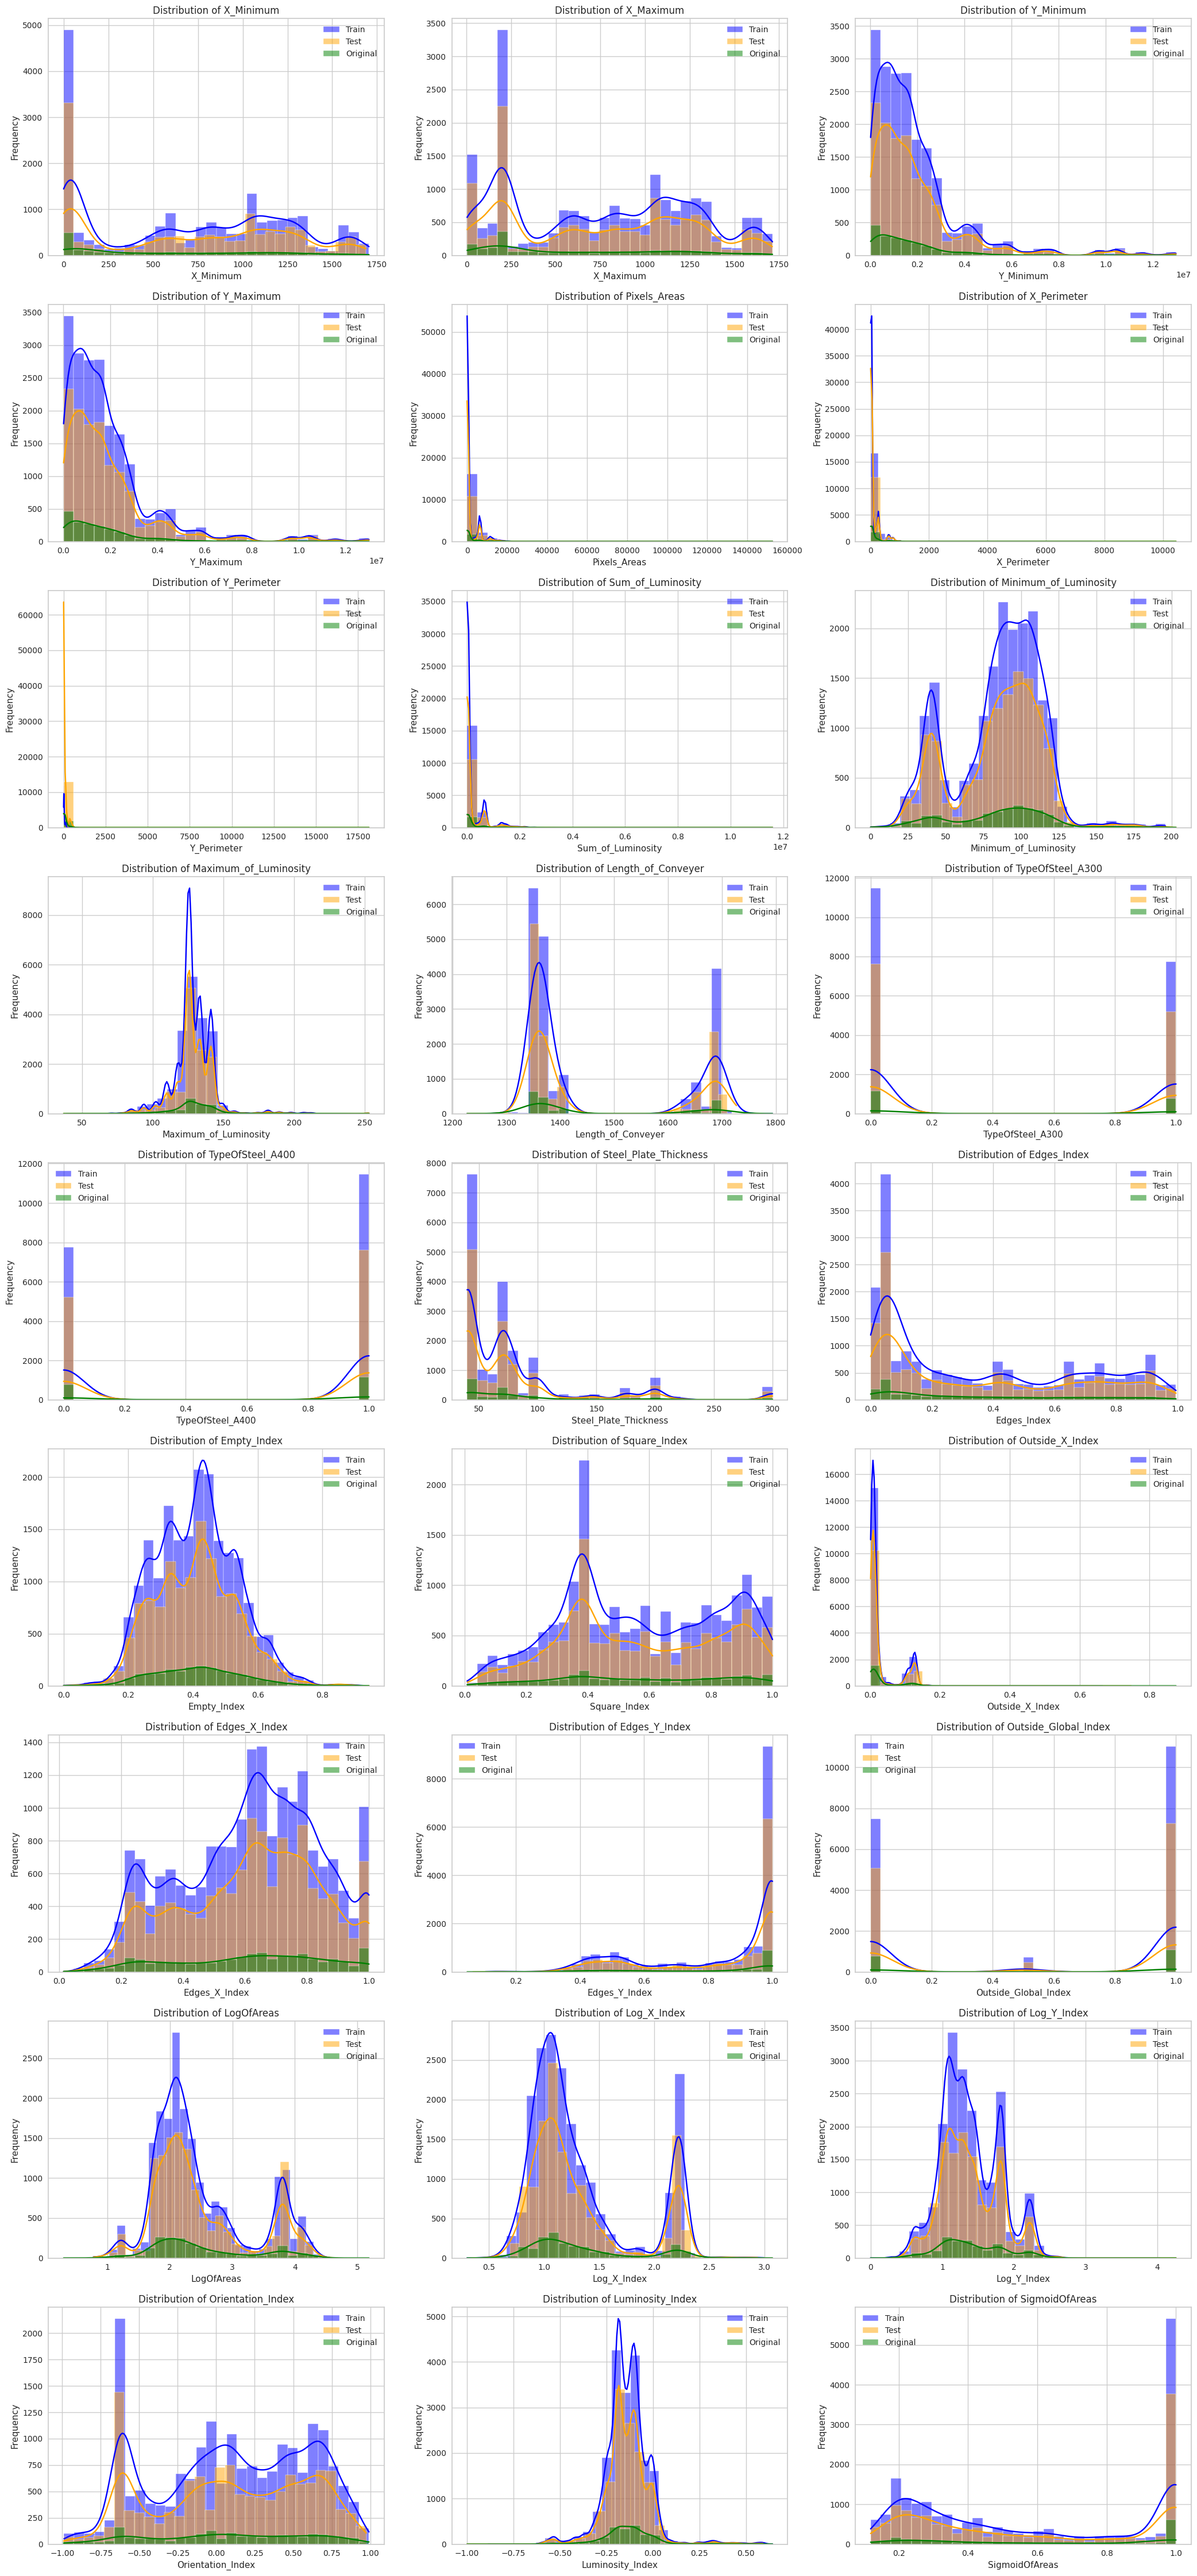

In [3]:
cont_cols = test.columns
colors = ['blue', 'orange', 'green']  

num_plots = len(cont_cols)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(cont_cols):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    sns.histplot(train_copy[feature], kde=True, color=colors[0], label='Train', alpha=0.5, bins=30, ax=ax)
    sns.histplot(test_copy[feature], kde=True, color=colors[1], label='Test', alpha=0.5, bins=30, ax=ax)
    sns.histplot(original[feature], kde=True, color=colors[2], label='Original', alpha=0.5, bins=30, ax=ax)

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()


<font size="3"> Some features have a lot of outliers and few features seem to have dual distributions</font>

# 4. Feature Engineering

In [4]:
def OHE(train_df,test_df,cols,target):
    '''
    Function for one hot encoding, it first combined the data so that no category is missed and
    the category with least frequency can be dropped because of redunancy
    '''
    combined = pd.concat([train_df, test_df], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col]).astype(int)
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        one_hot.columns=[str(f)+col for f in one_hot.columns]
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.loc[:, ~combined.columns.duplicated()]
    
    # split back to train and test dataframes
    train_ohe = combined[:len(train_df)]
    test_ohe = combined[len(train_df):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    return train_ohe, test_ohe

## 4.1 Stabilize Categorical Columns

<font size="3">I have converted the descrete features with unique less than 5% to categorical</font>

In [5]:
cat_cols = [f for f in test.columns if test[f].nunique()/test.shape[0]*100<5 and test[f].nunique()>2 ]
test[cat_cols].nunique()

def nearest_val(target):
    return min(common, key=lambda x: abs(x - target))

global cat_cols_updated
cat_cols_updated=[]
for col in cat_cols:
    train[f"{col}_cat"]=train[col]
    test[f"{col}_cat"]=test[col]
    cat_cols_updated.append(f"{col}_cat")
    uncommon=list((set(test[col].unique())| set(train[col].unique()))-(set(test[col].unique())& set(train[col].unique())))
    if uncommon:
        common=list(set(test[col].unique())& set(train[col].unique()))
        train[f"{col}_cat"]=train[col].apply(nearest_val)
        test[f"{col}_cat"]=test[col].apply(nearest_val)

In [6]:
def high_freq_ohe(train, test, extra_cols, target, n_limit=50):
    '''
    If you wish to apply one hot encoding on a feature with so many unique values, then this can be applied, 
    where it takes a maximum of n categories and drops the rest of them treating as rare categories
    '''
    train_copy=train.copy()
    test_copy=test.copy()
    ohe_cols=[]
    for col in extra_cols:
        dict1=train_copy[col].value_counts().to_dict()
        ordered=dict(sorted(dict1.items(), key=lambda x: x[1], reverse=True))
        rare_keys=list([*ordered.keys()][n_limit:])
#         ext_keys=[f[0] for f in ordered.items() if f[1]<50]
        rare_key_map=dict(zip(rare_keys, np.full(len(rare_keys),9999)))
        
        train_copy[col]=train_copy[col].replace(rare_key_map)
        test_copy[col]=test_copy[col].replace(rare_key_map)
    train_copy, test_copy = OHE(train_copy, test_copy, extra_cols, target)
    drop_cols=[f for f in train_copy.columns if "9999" in f or train_copy[f].nunique()==1]
    train_copy=train_copy.drop(columns=drop_cols)
    test_copy=test_copy.drop(columns=drop_cols)
    
    return train_copy, test_copy

def cat_encoding(train, test, target):
    global overall_best_score
    global overall_best_col
    table = PrettyTable()
    table.field_names = ['Feature', 'Encoded Features', 'Log Loss Score']
    train_copy=train.copy()
    test_copy=test.copy()
    train_dum = train.copy()
    for feature in cat_cols_updated:
#         print(feature)
#         cat_labels = train_dum.groupby([feature])[target].mean().sort_values().index
#         cat_labels2 = {k: i for i, k in enumerate(cat_labels, 0)}
#         train_copy[feature + "_target"] = train[feature].map(cat_labels2)
#         test_copy[feature + "_target"] = test[feature].map(cat_labels2)

        dic = train[feature].value_counts().to_dict()
        train_copy[feature + "_count"] =train[feature].map(dic)
        test_copy[feature + "_count"] = test[feature].map(dic)

        dic2=train[feature].value_counts().to_dict()
#         list1=np.arange(len(dic2.values()),0,-1) # Higher rank for high count
        list1=np.arange(len(dic2.values())) # Higher rank for low count
        dic3=dict(zip(list(dic2.keys()),list1))
        
        train_copy[feature+"_count_label"]=train[feature].replace(dic3).astype(float)
        test_copy[feature+"_count_label"]=test[feature].replace(dic3).astype(float)

        temp_cols = [ feature + "_count", feature + "_count_label"]#feature + "_target",

        

        if train_copy[feature].nunique()<=5:
            train_copy[feature]=train_copy[feature].astype(str)+"_"+feature
            test_copy[feature]=test_copy[feature].astype(str)+"_"+feature
            train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
            
        else:
            train_copy,test_copy=high_freq_ohe(train_copy,test_copy,[feature], target, n_limit=5)
        train_copy=train_copy.drop(columns=[feature])
        test_copy=test_copy.drop(columns=[feature])
        
        
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        auc_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].astype(int).values

            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
                model =  HistGradientBoostingClassifier (max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val,  y_pred))
            auc_scores.append((f, np.mean(auc)))
            
        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]

        corr = train_copy[temp_cols].corr(method='pearson')
        corr_with_best_col = corr[best_col]
        cols_to_drop = [f for f in temp_cols if corr_with_best_col[f] > 0.5 and f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        if cols_to_drop:
            train_copy = train_copy.drop(columns=cols_to_drop)
            test_copy = test_copy.drop(columns=cols_to_drop)

        table.add_row([feature, best_col, best_auc])
#         print(feature)
        
#     print(table)
    return train_copy, test_copy

# 5. Modeling

## 5.1 Models

In [7]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val

class Classifier:
    def __init__(self,n_estimators=100, device="cpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.1,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': self.random_state,
#             'class_weight':class_weights_dict,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        xgb_params2=xgb_params.copy() 
        xgb_params2['subsample']= 0.5
        xgb_params2['max_depth']=9
        xgb_params2['learning_rate']=0.045
        xgb_params2['colsample_bytree']=0.3

        xgb_params3=xgb_params.copy() 
        xgb_params3['subsample']= 0.6
        xgb_params3['max_depth']=6
        xgb_params3['learning_rate']=0.02
        xgb_params3['colsample_bytree']=0.7      

        xgb_params4=xgb_params.copy() 
        xgb_params4['subsample']= 0.5943421542786502
        xgb_params4['max_depth']=6
        xgb_params4['learning_rate']=0.109
        xgb_params4['colsample_bytree']=0.5595039093313848
        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 8,
            'learning_rate': 0.02,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
            'verbose':-1,
#             'class_weight':class_weights_dict,
        } 
        lgb_params2 = {
            'n_estimators': self.n_estimators,
            'max_depth': 5,
            'learning_rate': 0.015,
            'subsample': 0.50,
            'colsample_bytree': 0.1,
            'reg_alpha': 0.07608657669988828,
            'reg_lambda': 0.2255036530113883,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
        }
        lgb_params3=lgb_params.copy()  
        lgb_params3['subsample']=0.9
        lgb_params3['reg_lambda']=0.3461495211744402
        lgb_params3['reg_alpha']=0.3095626288582237
        lgb_params3['max_depth']=8
        lgb_params3['learning_rate']=0.007
        lgb_params3['colsample_bytree']=0.5

        lgb_params4=lgb_params2.copy()  
        lgb_params4['subsample']=0.3
        lgb_params4['reg_lambda']=0.49406951573373614
        lgb_params4['reg_alpha']=0.16269100796945424
        lgb_params4['max_depth']=9
        lgb_params4['learning_rate']=0.117
        lgb_params4['colsample_bytree']=0.3

        cb_params = {
            'iterations': self.n_estimators,
            'depth': 13,
            'learning_rate': 0.015,
            'l2_leaf_reg': 0.5,
            'random_strength': 0.1,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 50,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bernoulli',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_sym_params = cb_params.copy()
        cb_sym_params['grow_policy'] = 'SymmetricTree'
        cb_loss_params = cb_params.copy()
        cb_loss_params['grow_policy'] = 'Lossguide'
        
        cb_params2=  cb_params.copy()
        cb_params2['learning_rate']=0.01
        cb_params2['depth']=8

        cb_params3={
            'iterations': self.n_estimators,
            'random_strength': 0.5783342241486167, 
            'one_hot_max_size': 10, 
            'max_bin': 150, 
            'learning_rate': 0.177, 
            'l2_leaf_reg': 0.705662073971363, 
            'grow_policy': 'SymmetricTree', 
            'depth': 5, 
            'max_bin': 200,
            'od_wait': 65,
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_params4=  cb_params.copy()
        cb_params4['learning_rate']=0.01
        cb_params4['depth']=12
        dt_params= {'min_samples_split': 30, 'min_samples_leaf': 10, 'max_depth': 8, 'criterion': 'gini'}
        
        models = {
            'xgb': xgb.XGBClassifier(**xgb_params),
#            'xgb2': xgb.XGBClassifier(**xgb_params2),
#            'xgb3': xgb.XGBClassifier(**xgb_params3),
#            'xgb4': xgb.XGBClassifier(**xgb_params4),
#            'lgb': lgb.LGBMClassifier(**lgb_params),
#             'lgb2': lgb.LGBMClassifier(**lgb_params2),
#             'lgb3': lgb.LGBMClassifier(**lgb_params3),
#             'lgb4': lgb.LGBMClassifier(**lgb_params4),
            'cat': CatBoostClassifier(**cb_params),
#            'cat2': CatBoostClassifier(**cb_params2),
#             'cat3': CatBoostClassifier(**cb_params3),
#             'cat4': CatBoostClassifier(**cb_params4),
             "cat_sym": CatBoostClassifier(**cb_sym_params),
#             "cat_loss": CatBoostClassifier(**cb_loss_params),
#             'hist_gbm' : HistGradientBoostingClassifier (max_iter=300, learning_rate=0.001,  max_leaf_nodes=80,                                                       
#            max_depth=6,random_state=self.random_state),#class_weight=class_weights_dict, 
#             'gbdt': GradientBoostingClassifier(max_depth=6,  n_estimators=1000,random_state=self.random_state),
#             'lr': LogisticRegression(),
#             'rf': RandomForestClassifier(max_depth= 9,max_features= 'auto',min_samples_split= 10,
#                                                           min_samples_leaf= 4,  n_estimators=500,random_state=self.random_state),
#            'svc': SVC(gamma="auto", probability=True),
#             'knn': KNeighborsClassifier(n_neighbors=5),
#             'mlp': MLPClassifier(random_state=self.random_state, max_iter=1000),
#             'etr':ExtraTreesClassifier(min_samples_split=55, min_samples_leaf= 15, max_depth=10,
#                                        n_estimators=200,random_state=self.random_state),
#             'dt' :DecisionTreeClassifier(**dt_params,random_state=self.random_state),
#             'ada': AdaBoostClassifier(random_state=self.random_state),
                                       
        }
        return models

## 5.2 Optimize Ensemble Weights

In [8]:
class OptunaWeights:
    def __init__(self, random_state, n_trials=5000):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 0, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        auc_score = roc_auc_score(y_true, weighted_pred)
        log_loss_score=log_loss(y_true, weighted_pred)
        return auc_score#/log_loss_score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='maximize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

## 5.3 Fit The Model

In [9]:
def fit_model(X_train,X_test,y_train):
    kfold = True
    n_splits = 1 if not kfold else 5
    random_state = 2023
    random_state_list = [42] # used by split_data [71]
    n_estimators = 9999 # 9999
    early_stopping_rounds = 300
    verbose = False

    splitter = Splitter(kfold=kfold, n_splits=n_splits)

    # Initialize an array for storing test predictions
    test_predss = np.zeros(X_test.shape[0])
    y_train_pred=y_train.copy()

    ensemble_score = []
    weights = []
    trained_models = {'xgb':[], 'lgb':[]}


    for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
        n = i % n_splits
        m = i // n_splits

        # Get a set of Regressor models
        classifier = Classifier(n_estimators, device, random_state)
        models = classifier.models

        # Initialize lists to store oof and test predictions for each base model
        oof_preds = []
        test_preds = []

        # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
        for name, model in models.items():
            if ('cat' in name) or ("lgb" in name) or ("xgb" in name):
                if 'lgb' in name: #categorical_feature=cat_features
                    model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)]),#,categorical_feature=cat_features,)
                elif 'cat' in name:
                    model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)],#cat_features=cat_features,
                              early_stopping_rounds=early_stopping_rounds, verbose=verbose)
                else:
                    model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=0)
            else:
                model.fit(X_train_, y_train_)

            test_pred = model.predict_proba(X_test)[:, 1]
            y_val_pred = model.predict_proba(X_val)[:, 1]

            score = roc_auc_score(y_val, y_val_pred.reshape(-1, 1))
    #         score = accuracy_score(y_val, acc_cutoff_class(y_val, y_val_pred))

            print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] ROC AUC score: {score:.5f}')

            oof_preds.append(y_val_pred)
            test_preds.append(test_pred)

            if name in trained_models.keys():
                trained_models[f'{name}'].append(deepcopy(model))
        # Use Optuna to find the best ensemble weights
        optweights = OptunaWeights(random_state=random_state)
        y_val_pred = optweights.fit_predict(y_val.values, oof_preds)

        score = roc_auc_score(y_val, y_val_pred.reshape(-1, 1))
    #     score = accuracy_score(y_val, acc_cutoff_class(y_val, y_val_pred))
        print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] ------------------>  ROC AUC score {score:.5f}')
        ensemble_score.append(score)
        weights.append(optweights.weights)

        test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
        y_train_pred.loc[y_val.index]=np.array(y_val_pred)

        gc.collect()
    # Calculate the mean ROC AUC  score of the ensemble
    mean_score = np.mean(ensemble_score)
    std_score = np.std(ensemble_score)
    print(f'Ensemble ROC AUC score {mean_score:.5f} ± {std_score:.5f}')

    # Print the mean and standard deviation of the ensemble weights for each model
    print('--- Model Weights ---')
    mean_weights = np.mean(weights, axis=0)
    std_weights = np.std(weights, axis=0)
    for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
        print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')
    print(f'Overall OOF Preds AUC SCORE {roc_auc_score(y_train,y_train_pred)}')
    
    print("__________________________________________________________________")
    return test_predss

In [10]:
def post_processor(train, test):
    cols=test.columns.tolist()
    train_cop=train.copy()
    test_cop=test.copy()
    drop_cols=[]
    for i, feature in enumerate(cols):
        for j in range(i+1, len(cols)):
            if sum(abs(train_cop[feature]-train_cop[cols[j]]))==0:
                if cols[j] not in drop_cols:
                    drop_cols.append(cols[j])
    print(drop_cols)
    train_cop.drop(columns=drop_cols,inplace=True)
    test_cop.drop(columns=drop_cols,inplace=True)
    
    return train_cop, test_cop

    

In [11]:
submission=pd.read_csv("/kaggle/input/playground-series-s4e3/sample_submission.csv")
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [12]:
count=0
for col in target:
    train_temp=train[test.columns.tolist()+[col]]
    test_temp=test.copy()
    train_temp, test_temp= cat_encoding(train_temp, test_temp, col)
    
    final_features=test.columns.tolist()
    sc=StandardScaler()

    train_scaled=train_temp.copy()
    test_scaled=test_temp.copy()
    
    train_scaled[final_features]=sc.fit_transform(train[final_features])
    test_scaled[final_features]=sc.transform(test[final_features])

#     train_cop, test_cop=   post_processor(train_scaled, test_scaled) 
    train_cop, test_cop= train_scaled, test_scaled
    X_train = train_cop.drop(columns=[col])
    y_train = train_cop[col]
    
    X_test = test_cop.copy()
    
    test_predss=fit_model(X_train,X_test,y_train)
    submission[col]=test_predss
    
    count+=1
    print(f'Column {col}, loop # {count}')


xgb [FOLD-0 SEED-42] ROC AUC score: 0.87710
cat [FOLD-0 SEED-42] ROC AUC score: 0.87413
cat_sym [FOLD-0 SEED-42] ROC AUC score: 0.87185
Ensemble [FOLD-0 SEED-42] ------------------>  ROC AUC score 0.88005
xgb [FOLD-1 SEED-42] ROC AUC score: 0.87469
cat [FOLD-1 SEED-42] ROC AUC score: 0.86904
cat_sym [FOLD-1 SEED-42] ROC AUC score: 0.86388
Ensemble [FOLD-1 SEED-42] ------------------>  ROC AUC score 0.87579
xgb [FOLD-2 SEED-42] ROC AUC score: 0.88197
cat [FOLD-2 SEED-42] ROC AUC score: 0.87521
cat_sym [FOLD-2 SEED-42] ROC AUC score: 0.87550
Ensemble [FOLD-2 SEED-42] ------------------>  ROC AUC score 0.88390
xgb [FOLD-3 SEED-42] ROC AUC score: 0.87790
cat [FOLD-3 SEED-42] ROC AUC score: 0.87313
cat_sym [FOLD-3 SEED-42] ROC AUC score: 0.87436
Ensemble [FOLD-3 SEED-42] ------------------>  ROC AUC score 0.88119
xgb [FOLD-4 SEED-42] ROC AUC score: 0.88616
cat [FOLD-4 SEED-42] ROC AUC score: 0.88117
cat_sym [FOLD-4 SEED-42] ROC AUC score: 0.88373
Ensemble [FOLD-4 SEED-42] ------------------

# 6.Submission

In [13]:
submission.to_csv("submission_pure.csv",index=False)
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.581904,0.000505,0.009017,0.052976,0.010465,0.105562,0.349736
1,19220,0.195281,0.011028,0.019174,0.058513,0.071096,0.114742,0.377877
2,19221,0.001585,0.022150,0.035557,0.065817,0.003023,0.282688,0.483738
3,19222,0.119113,0.000839,0.004376,0.062337,0.006421,0.333207,0.430646
4,19223,0.003471,0.000888,0.005936,0.073726,0.003182,0.665586,0.331156


# 7. Generalization Ensemble

In [14]:
sub1=pd.read_csv("/kaggle/input/multiclass-feature-engineering-thoughts/submission.csv")
sub2=pd.read_csv("/kaggle/input/ps4e03-multi-class-lightgbm/submission.csv")

sub_list=[sub1, sub2,submission]
# weights=np.random.randint(1,4,len(sub_list))
weights=[1,1,1]

weighted_list = [item for sublist, weight in zip(sub_list, weights) for item in [sublist] * weight]

def ensemble_mean(sub_list,cols, mean="AM"):
    
    sub_out=sub_list[0].copy()
    if mean=="AM":
        for col in cols:
            sub_out[col]=sum(df[col] for df in sub_list)/len(sub_list)
    elif mean=="GM":
        for df in sub_list[1:]:

            for col in cols:
                sub_out[col]*=df[col]
        for col in cols:
            sub_out[col]=(sub_out[col])**(1/len(sub_list))
    elif mean=="HM":
        for col in cols:
            sub_out[col]=len(sub_list)/sum(1/df[col] for df in sub_list)
    sub_out[cols]=sub_out[cols].div(sub_out[cols].sum(axis=1), axis=0)
    
    return sub_out
    
sub_ensemble=ensemble_mean(weighted_list,target,mean="AM")
sub_ensemble.to_csv('submission.csv',index=False)
sub_ensemble.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.477004,0.003343,0.006496,0.018697,0.016997,0.135482,0.341981
1,19220,0.279041,0.027271,0.015794,0.023027,0.128691,0.151326,0.374850
2,19221,0.005277,0.036787,0.046861,0.026154,0.008270,0.324258,0.552393
3,19222,0.112604,0.006054,0.003876,0.024882,0.012193,0.406423,0.433968
4,19223,0.007359,0.004891,0.004317,0.028076,0.007328,0.623117,0.324912
